In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize

In [70]:
crime=pd.read_csv('crime_data.csv')
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [72]:
crime2=crime.iloc[:,1:]
crime2

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [77]:
crime_norm=pd.DataFrame(normalize(crime2),columns=crime2.columns)
crime_norm.head(10)

,Murder,Assault,UrbanPop,Rape
0,0.054031,0.966016,0.237411,0.086778
1,0.036872,0.969739,0.176987,0.164081
2,0.026439,0.959624,0.261122,0.101185
3,0.044528,0.961392,0.252998,0.098669
4,0.030657,0.940134,0.309972,0.138295
5,0.035594,0.919142,0.351437,0.174367
6,0.024486,0.816202,0.571341,0.082362
7,0.023674,0.954965,0.288897,0.063397
8,0.044478,0.967547,0.231056,0.092134
9,0.078534,0.952332,0.270805,0.116446


In [64]:
# # Normalization another way
# def norm_fun(i):
#     x= (i-i.min())/(i.max())-(i.min())
#     return (x)

# crime_norm = norm_fun(crime.iloc[:,1:])

In [78]:
wcss = [] # sum of squares within cluster
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, random_state=1)
    kmeans.fit(crime_norm)
    wcss.append(kmeans.inertia_)


C:\Users\abc\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\abc\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\abc\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\abc\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:13

<function matplotlib.pyplot.show(close=None, block=None)>

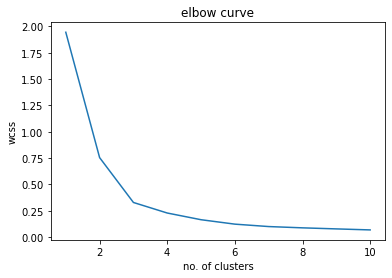

In [80]:
plt.plot(range(1,11),wcss)
plt.title("elbow curve")
plt.xlabel("no. of clusters")
plt.ylabel("wcss")
plt.show

In [82]:
# taking K=4
model=KMeans(n_clusters=4)
model.fit(crime_norm)

C:\Users\abc\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [85]:
model.labels_ #getting the labels for 4 clusters from 0-3 for every state

array([0, 0, 0, 0, 2, 2, 3, 0, 0, 0, 1, 2, 2, 3, 1, 3, 2, 0, 3, 0, 3, 0,
       1, 0, 2, 2, 3, 2, 1, 3, 0, 2, 0, 1, 3, 2, 2, 3, 3, 0, 3, 0, 2, 3,
       3, 2, 3, 2, 1, 2])

In [87]:
md=pd.Series(model.labels_)
crime['clust']=md
crime


,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,2
5,Colorado,7.9,204,78,38.7,2
6,Connecticut,3.3,110,77,11.1,3
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,0


In [90]:
crime.iloc[:,1:6].groupby(crime.clust).mean()

,Murder,Assault,UrbanPop,Rape,clust
clust,,,,,
0,12.380000,261.266667,61.400000,25.966667,0.0
1,2.616667,54.833333,62.000000,12.333333,1.0
2,8.206667,177.333333,68.333333,24.726667,2.0
3,4.635714,116.428571,68.500000,16.228571,3.0
